In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# GeoPandas


<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Geoseries y GeoDataFrame](#section_geodataframe)

[Ejemplo mapa de Argentina y ciudades](#section_ejemplo)

$\hspace{.5cm}$[Ciudades](#section_ciudades)

$\hspace{.5cm}$[Paises](#section_paises)

$\hspace{.5cm}$[Integrando el país con las ciudades](#section_integracion)

[Extra: Capitales de países](#section_capitales)

---



## Geopandas - GeoDataFrame


<a id="section_intro"></a> 
###  Intro
[volver a TOC](#section_toc)

**Geopandas** es una biblioteca que permite trabajar con datos geoespaciales en Python. Para ello, usa las facilidades de otras bibliotecas de Python.

- Extiende la funcionalidad de **pandas**. Es decir que se pueden realizar todas las operaciones que se aplican a las *Series* y *DataFrame*. 

- Provee una interfaz con la libreria **matplotlib** para generar mapas. Las figuras geométricas se pueden mapear facilmente con el método plot().

- Permite operaciones sobre los datos geométricos que representan a los datos espaciales (puntos, líneas y polígonos). Para ello hace uso de la libreria **shapely**.

- Facilita el acceso a datos en múltiples *formatos de archivos*, extendiendo las operaciones que brinda la librería **fiona**.

- Realiza **proyecciones**, es decir, permite usar distintos tipos de coordenadas para referenciar la posición geográfica de los datos geoespaciales.

Vamos a analizar cada de uno de estos puntos con más detalle.

<a id="section_geodataframe"></a> 
### GeoSeries y GeoDataFrame
[volver a TOC](#section_toc)

Así como *Pandas* tiene como estructura de datos a las *Series* y *Dataframe*, *Geopandas* tiene algo similar llamado *Geoseries* y *GeoDataFrame*.

La diferencia entre ellos es que tanto **GeoSeries** como **GeoDataFrame**, deben contener al menos una columna con tipos de datos geoespaciales. Esta columna se la llama por default *geometry*.

La columna *geometry* contiene una forma geométrica que representa la posición espacial del objeto. Por ejemplo, la posicion espacial de un negocio - sus coordenadas- se expresan mediante la forma geométrica *punto*.

Las formas geométricas son:
- POINT. Un punto
- LINESTRING. Una línea
- POLYGON. Una superficie

También se pueden representar colecciones de formas:

- MULTIPOINT. Varios puntos
- MULTILINESTRING. Varias líneas
- MULTIPOLYGON. Varias superficies

<a id="section_ejemplo"></a> 
### Ejemplo: mapa de Argentina y ciudades
[volver a TOC](#section_toc)

Vamos a graficar ciudades de Argentina sobre el mapa del país.

Se necesitan los datos de las ciudades con sus coordenadas geográficas, su *latitud* y *longitud*. Cada ciudad deberá tener la forma de **punto**.

Y por otro lado, un mapa de la Argentina. El mapa deberá tener la forma de **polígono**, representando el contorno del país.

<div>
    <div class = "mapa">
        <img src='img/M1_Clase_07_2_001_Mapa_Completo.PNG' alt="Mapa de Argentina con ciudades" width=25% height=40%>
        <p><i>Resultado final: Mapa de Argentina con ciudades</i></p>
    </div>
</div>

<div id="caja4" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
    <div style="float:left;width: 85%;"><label>EN <a href="https://www.geodatos.net/coordenadas" target="_blank">https://www.geodatos.net/coordenadas</a> se pueden buscar las coordenadas de las ciudades del mundo.</label></div>
</div>


<a id="section_ciudades"></a> 
### Ciudades
[volver a TOC](#section_toc)

Comenzamos generando un *dataframe Pandas* con los datos de las ciudades. Observar que se incluyen los datos geográficos latitud y longitud como *números*, para ubicar en el espacio a las ciudades.

In [2]:
df_ciudad = pd.DataFrame(
    {'Ciudad': ['Buenos Aires', 'Córdoba', 'Rosario', 'Mendoza', 'San Miguel de Tucumán','Bariloche'],
     'Provincia': ['CABA', 'Córdoba', 'Santa Fe', 'Mendoza', 'Tucumán','Rio Negro'],
     'Latitud':  [-34.61315, -31.4135, -32.94682, -32.89084, -26.82414, -41.14557],
     'Longitud': [-58.37723, -64.18105, -60.63932, -68.82717, -65.2226, -71.30822]})

In [3]:
type(df_ciudad)

pandas.core.frame.DataFrame

In [4]:
df_ciudad.dtypes

Ciudad        object
Provincia     object
Latitud      float64
Longitud     float64
dtype: object

Como latitud y longitud son numéricos, se deben transformar en una forma geométrica para poder representarlos como dato geoespacial.

Geopandas lo realiza con el método `points_from_xy`, generando la forma geométrica **POINT**. 

**IMPORTANTE:** este método tiene dos parámetros, el primero, x, debe recibir la **longitud**, y el segundo, y, la **latitud**. Se puede pensar lógicamente que debe ser a la inversa.

In [5]:
geometria = gpd.points_from_xy(df_ciudad.Longitud, df_ciudad.Latitud)
geometria

<GeometryArray>
Length: 6, dtype: geometry

Ahora transformamos el *dataframe* df_ciudad en un *geoDataFrame* llamado geo_arg; se combinan los datos del dataframe con la variable recién creada *geometría* (las coordenadas de la ciudad como forma geométrica).

Hay que recordar que los tipos de datos GeoDataFrame requieren al menos una columna con una forma geómetrica. Se recomienda llamarla *geometry*, ya que es el default para guardar este tipo de datos.

In [6]:
geo_arg = gpd.GeoDataFrame(df_ciudad, geometry=geometria)

In [7]:
geo_arg.dtypes

Ciudad         object
Provincia      object
Latitud       float64
Longitud      float64
geometry     geometry
dtype: object

In [8]:
geo_arg

,Ciudad,Provincia,Latitud,Longitud,geometry
0,Buenos Aires,CABA,-34.61315,-58.37723,POINT (-58.37723 -34.61315)
1,Córdoba,Córdoba,-31.41350,-64.18105,POINT (-64.18105 -31.41350)
2,Rosario,Santa Fe,-32.94682,-60.63932,POINT (-60.63932 -32.94682)
3,Mendoza,Mendoza,-32.89084,-68.82717,POINT (-68.82717 -32.89084)
4,San Miguel de Tucumán,Tucumán,-26.82414,-65.22260,POINT (-65.22260 -26.82414)
5,Bariloche,Rio Negro,-41.14557,-71.30822,POINT (-71.30822 -41.14557)


<a id="section_paises"></a> 
### Países
[volver a TOC](#section_toc)

Cada pais se representa por sus límites, o contornos. Dentro del tipo de datos geoespacial, usa la forma *POLYGON* o *MULTIPOLYGON*. Geopandas permite leerlos desde un archivo especial llamado *naturalearth_lowres*

Este archivo se guarda en una variable del tipo GeoDataFrame, ya que contiene una columna geometry con los polígonos de cada páis, sus contornos.

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
    <div style="float:left;width: 85%;"><label>¿Por qué algunos países necesitan un <i>MULTIPOLIGONO</i> en lugar de simplemente un <i>POLIGONO</i>?</label></div>
</div>    

Quizas porque algunos paises presentan islas


In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
type(world)

geopandas.geodataframe.GeoDataFrame

In [11]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<a id="section_integracion"></a> 
### Integrando el país con las ciudades
[volver a TOC](#section_toc)

Ahora creamos el mapa de Argentina con las ciudades. Para realizar gráficos se usa el método *plot* de la variable GeoDataFrame geo_arg, el cual *dibuja la forma que se encuentra en la columna geometry*.

Para dibujar el país, une las coordenadas del polígono que representa los límites del país.

Para dibujar las ciudades, como solo tiene una coordenada, genera un punto.

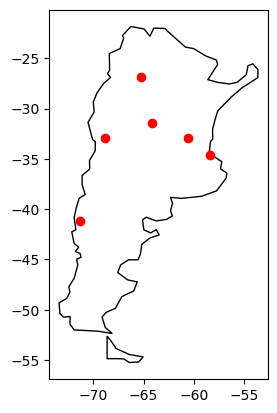

In [12]:
# Mapa de Argentina
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black')

# Sobre las ciudades superpone el mapa del país
geo_arg.plot(ax=ax, color='red')

plt.show()

<div id="caja_binomial_poisson" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>Intentar dibujar a la ciudad de Viedma, de la provincia de Rio Negro, sobre el mapa de Argentina.<br> Su ubicación geográfica es latitud: -40.81345, longitud: -62.99668</label></div>
</div>


In [16]:
viedma = pd.DataFrame({'Ciudad': ['Viedma'],
                       'Provincia': ['Rio Negro'],
                       'Latitud': [-40.81345],
                       'Longitud' : [-62.99668]})

In [17]:
viedma.head()

,Ciudad,Provincia,Latitud,Longitud
0,Viedma,Rio Negro,-40.81345,-62.99668


In [18]:
geometria_vied = gpd.points_from_xy(viedma.Longitud, viedma.Latitud)

In [19]:
geo_vied = gpd.GeoDataFrame(viedma, geometry=geometria_vied)

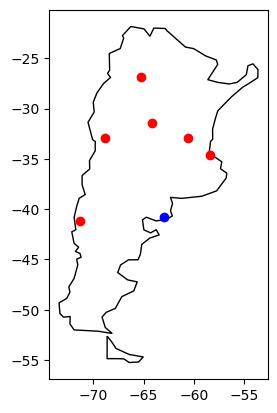

In [20]:
# Mapa de Argentina
ax = world[world.name == 'Argentina'].plot(color='white', edgecolor='black')

# Sobre las ciudades superpone el mapa del país
geo_arg.plot(ax=ax, color='red')

#Punto de viedma
geo_vied.plot(ax=ax, color='blue')

plt.show()

<a id="section_capitales"></a> 
### Extra: Capitales de países
[volver a TOC](#section_toc)

Asi como existe un archivo para las figuras de los países, existe otro para los puntos (coordenadas) de las capitales de los países.

In [21]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [22]:
world_cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world_cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


---

### Referencias

Geopandas Documentacion

https://geopandas.org/index.html

The GeoPandas Cookbook

https://www.martinalarcon.org/2018-12-31-d-geopandas/

The Shapely User Manual

https://shapely.readthedocs.io/en/stable/manual.html